# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [1]:
!pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-03/1.4-lab/code/starter-code


In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv('/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-03/1.4-lab/assets/Sacramentorealestatetransactions.csv')

#data['city'].value_counts()

#topCity = data['city'] == "SACRAMENTO"
#data[topCity]

data.info()

# We need to process the dates to be datetime variables
#data["sale_date"] = pd.to_datetime(data["sale_date"])
#data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [20]:
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


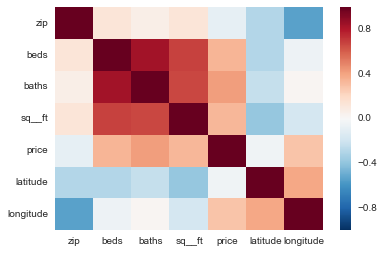

In [21]:
sns.heatmap(data.corr())

## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

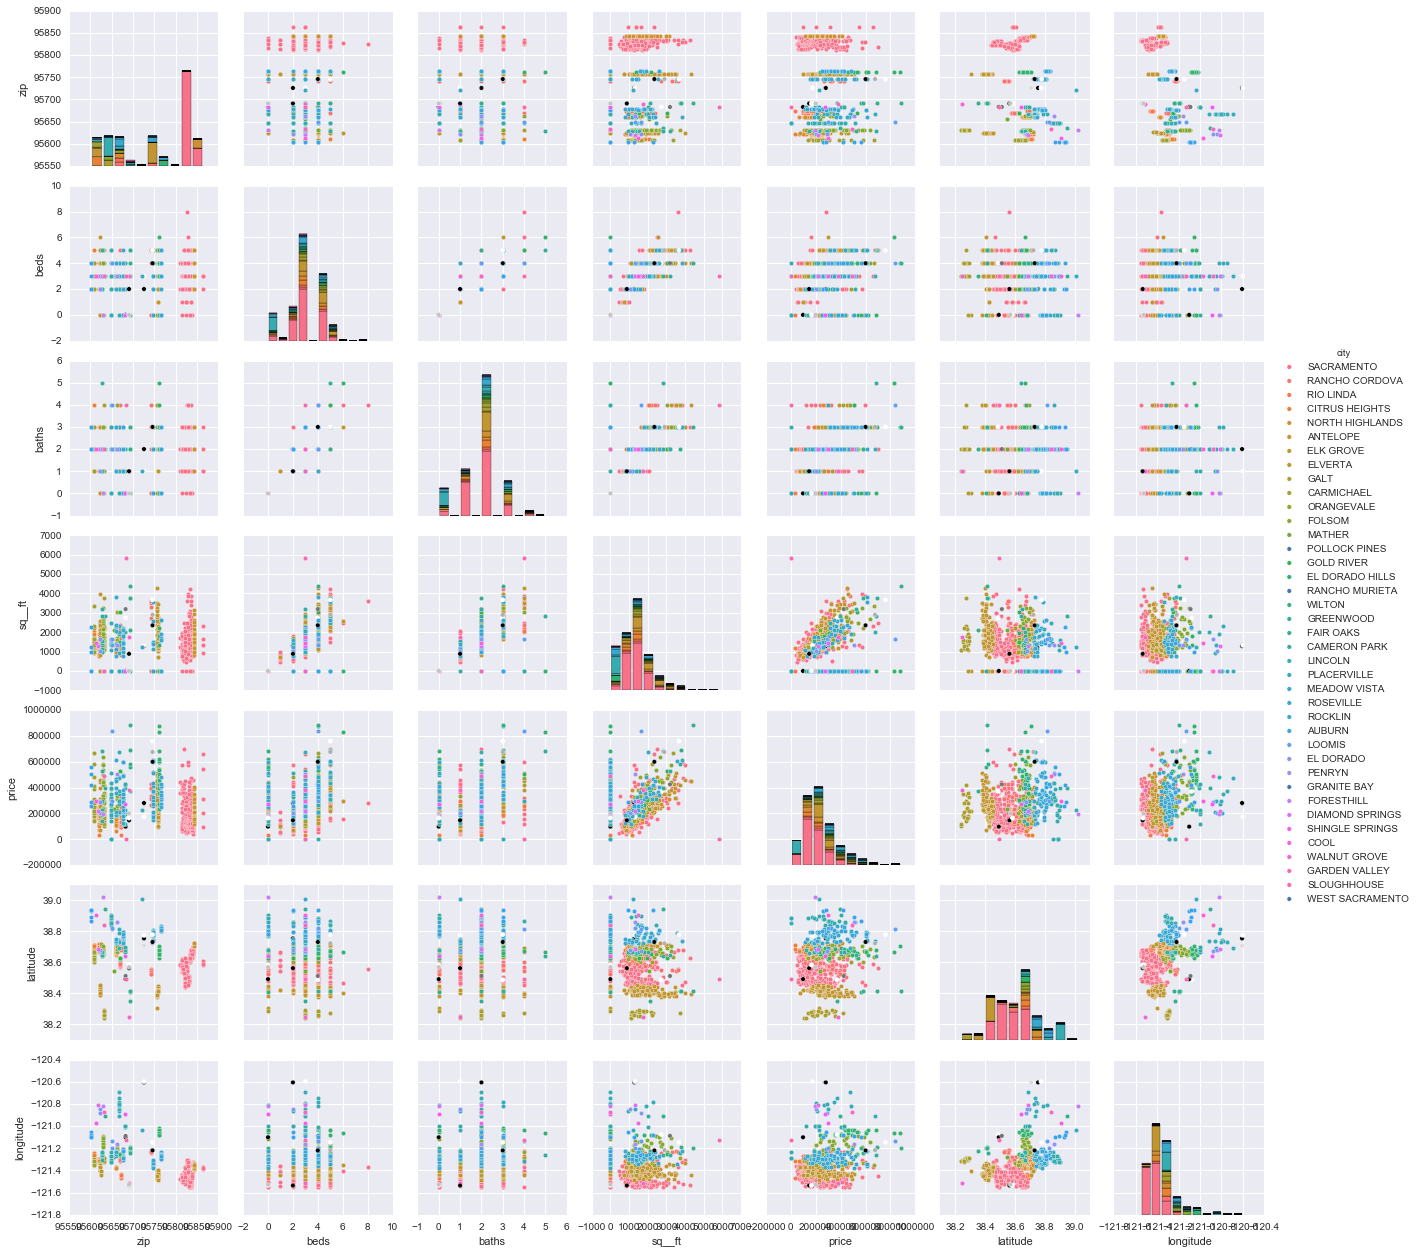

In [22]:
# For the numerical variables
#for column in ["zip", "beds", "baths", "sq__ft", "latitude", "longitude"]:
#    data.plot.scatter(x=column, y="price")

# For the categorical variables

#for column in ["city", "zip", "type"]:
#    plt.figure(figsize=(12, 12))
#    sns.swarmplot(x=column, y="price", data=data)
#    sns.plt.show()
    
# For date:

#plt.plot_date(data["sale_date"], data["price"])
#plt.show()

# or better yet
#plt.figure(figsize=(12, 12))
#sns.swarmplot(x="sale_date", y="price", data=data)


sns.pairplot(data, hue='city')

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

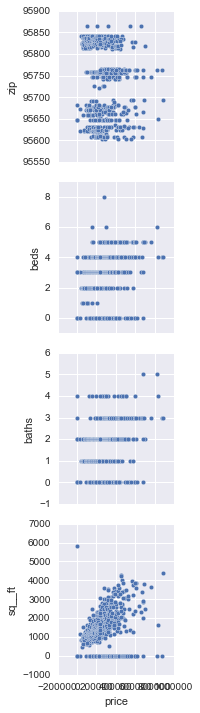

In [60]:
sns.pairplot(data,
...          x_vars=['price'],
...          y_vars=['zip', 'beds', 'baths', 'sq__ft',])

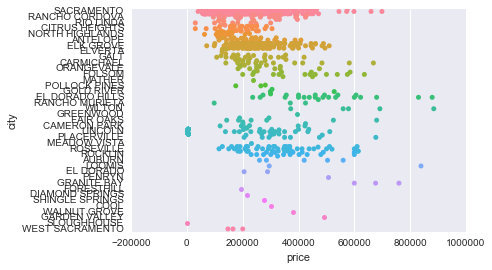

In [33]:
sns.swarmplot(data['price'], data['city'])

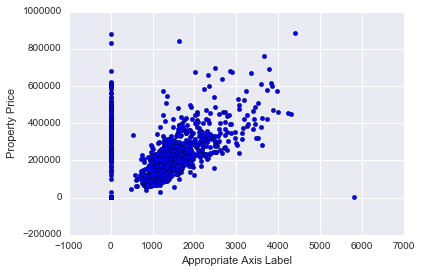

In [62]:
x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

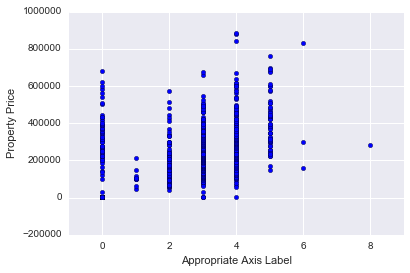

In [63]:
x = data['beds']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

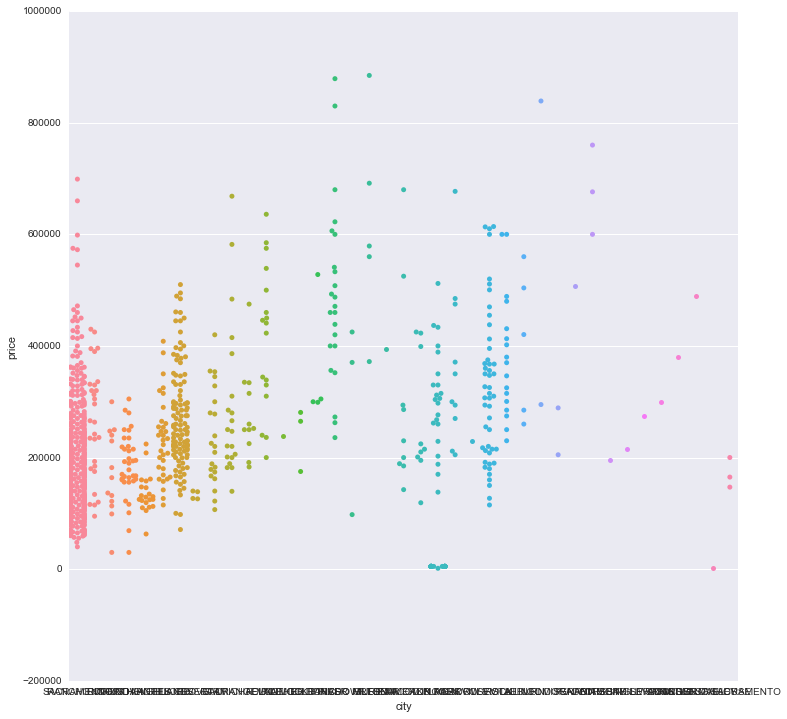

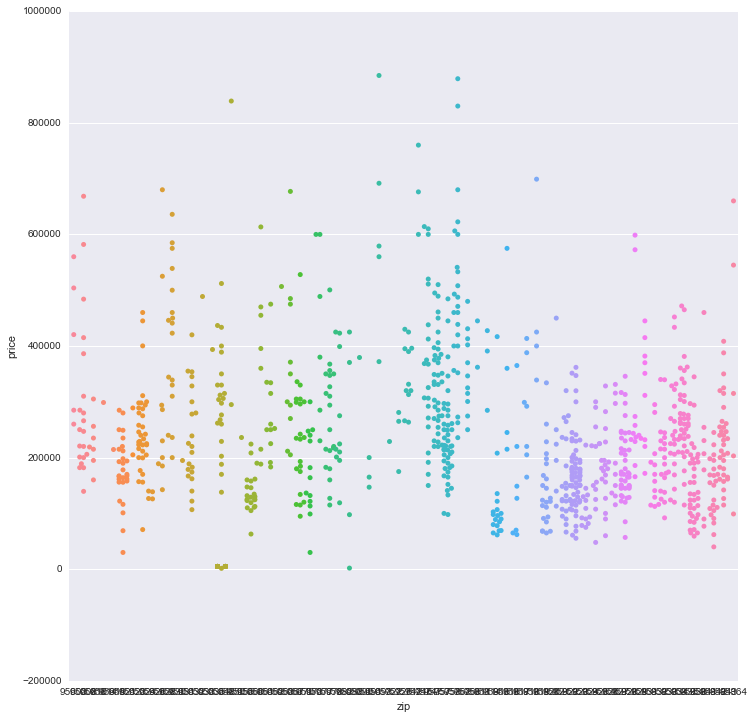

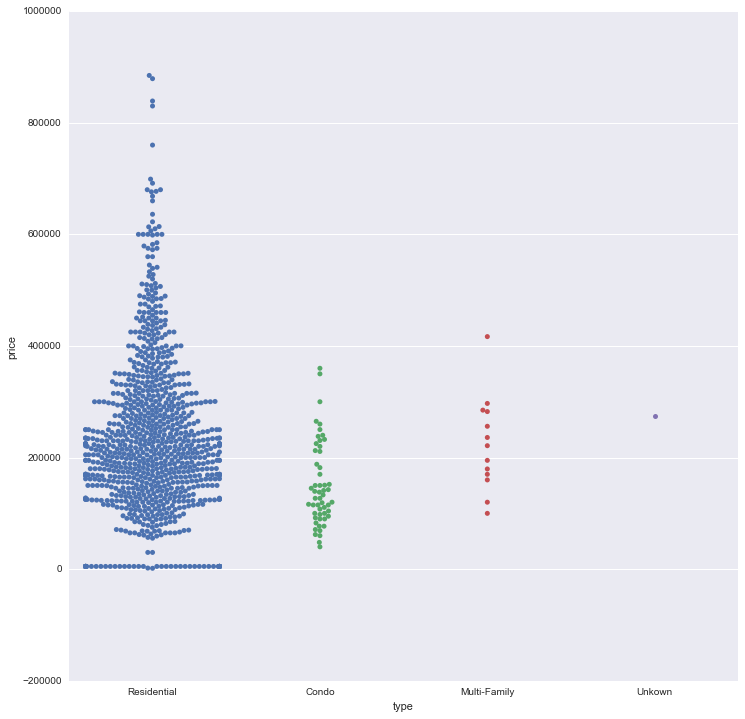

In [67]:
for column in ['city', 'zip', 'type']:
    plt.figure(figsize=(12,12))
    sns.swarmplot(x=column, y='price', data=data)
    sns.plt.show()

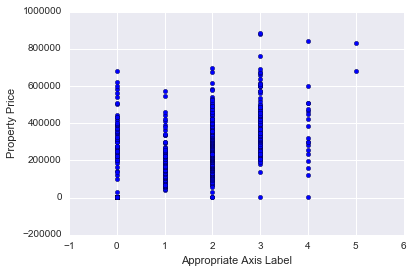

In [64]:
x = data['baths']
y = data['price']

plt.scatter(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

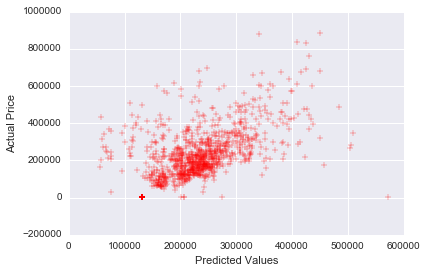

MSE: 13851905635.7


In [68]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error

X = data[["zip", "beds", "baths", "sq__ft", "latitude", "longitude"]]
y = data["price"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?